# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## Learning Objectives

At the end of the experiment, you will be able to

*   Use NLTK package

## Background


### What is NLTK? 


The Natural Language Toolkit (NLTK)is a package in python that provides libraries for different text processing techniques, such as classification, tokenization, stemming and tagging.

**NLTK corpus**


**Punkt:** This tokenizer divides a text into a list of sentences to build a model for abbreviation words, collocations and words with sentences. 



**Wordnet**: WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets).



**averaged_perceptron_tagger** it is used for tagging words with their parts of speech (POS)

**tagset:** The tagset consists of the following tags:

VB - verbs (all tenses and modes)

NN - nouns (common and proper)

PRON - pronouns

ADJ - adjectives

ADV - adverbs

ADP - adpositions (prepositions and postpositions)

CONJ - conjunctions

DET - determiners

NUM - cardinal numbers

PRT - particles or other function words

IN -  preposition/subordinating conjunction

NNS - noun plural ‘desks’

JJ  - adjective ‘big’

VBP - verb, sing. present, non-3d take

DT - determiner



### Setup Steps

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "Demo_NLTK" #name of the notebook
Answer = "Ungraded"

def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/shakespeare.txt")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Read the file for pre-processing

Using Shakespeare text file which is extracted in a webscraping notebook. 

In [5]:
f = open("shakespeare.txt", "r")

# Reading the file
text = f.read()
f.close()

### Normalizing Text

1. Converting all letters to lower case
2. Removing newline characters '\n' from given text



In [6]:
# Converting all letters to lower case
text = text.lower()

# Removing new line characters
text = text.replace('\n'," ")
print(text)

   comedy of errors: entire play        the comedy of errors  shakespeare homepage      | comedy of errors      | entire play  act i scene i. a hall in duke solinus's palace.  enter duke solinus, aegeon, gaoler, officers, and other attendants  aegeon  proceed, solinus, to procure my fall and by the doom of death end woes and all.  duke solinus  merchant of syracuse, plead no more; i am not partial to infringe our laws: the enmity and discord which of late sprung from the rancorous outrage of your duke to merchants, our well-dealing countrymen, who wanting guilders to redeem their lives have seal'd his rigorous statutes with their bloods, excludes all pity from our threatening looks. for, since the mortal and intestine jars 'twixt thy seditious countrymen and us, it hath in solemn synods been decreed both by the syracusians and ourselves, to admit no traffic to our adverse towns nay, more, if any born at ephesus be seen at any syracusian marts and fairs; again: if any syracusian born co

### Tokenization

Tokenization is a way to split the text into tokens. These tokens could be paragraphs, sentences, or individual words. These tokens are useful for finding such patterns and considered as a base step for stemming and Lemmatization

NLTK comes with many corpora, downloading a pre-trained Punkt tokenizer to perform tokenization, and a wordnet to perform lemmatization

In [7]:
# Importing nltk package
import nltk

# Downloading punkt from NLTK to perform sentence tokenization
nltk.download('punkt')

# Downloading wordnet from NLTK to perform Lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Sentence Level Tokenization

Sentence tokenization is the process of splitting text into individual sentences.

For example :

**Input :** `Sun rises in the east. Sun sets in the west.`

**Output:** `['Sun rises in the east.', 'Sun sets in the west.']`


In [8]:
from nltk.tokenize import sent_tokenize

# sent_tokenize() is to split a document or paragraph into sentences
sen_token = sent_tokenize(text) 

# Finding the length of the sentances
len(sen_token) 

1000

In [9]:
# Printing 10th sentence
print(sen_token[-1])

exeunt


Average sentence length  gives the maximum words in a sentence

In [10]:
word_count = [len(sent.split()) for i, sent in enumerate(sen_token)]
print("Number of words in each sentence:", word_count)

Avg_Sent = sum(word_count)//len(word_count)
print("Average number of words used in each sentence: ", Avg_Sent)

Number of words in each sentence: [28, 26, 58, 83, 21, 18, 24, 41, 23, 74, 34, 36, 19, 1, 5, 94, 103, 52, 7, 19, 17, 54, 4, 35, 50, 24, 28, 61, 37, 25, 16, 31, 30, 41, 6, 5, 13, 3, 2, 27, 36, 9, 21, 40, 3, 20, 26, 19, 21, 27, 20, 10, 20, 45, 12, 2, 7, 6, 80, 23, 18, 9, 20, 16, 38, 16, 20, 10, 6, 7, 20, 30, 38, 28, 15, 6, 5, 31, 14, 6, 7, 6, 10, 20, 47, 17, 11, 22, 6, 16, 33, 9, 9, 21, 9, 8, 78, 8, 8, 10, 9, 9, 9, 3, 14, 66, 10, 9, 13, 17, 7, 4, 20, 11, 25, 9, 10, 10, 4, 13, 24, 10, 6, 4, 2, 9, 8, 11, 9, 3, 16, 25, 10, 11, 7, 10, 20, 4, 4, 22, 22, 9, 17, 11, 9, 3, 21, 22, 8, 29, 3, 4, 8, 17, 24, 38, 16, 8, 3, 3, 39, 15, 4, 7, 5, 9, 4, 4, 9, 6, 11, 6, 6, 12, 23, 28, 17, 6, 13, 4, 6, 10, 13, 33, 18, 25, 7, 40, 8, 7, 10, 8, 15, 18, 25, 5, 8, 14, 14, 6, 13, 9, 4, 9, 14, 5, 14, 17, 13, 7, 19, 6, 18, 12, 19, 19, 27, 14, 17, 13, 18, 6, 9, 9, 6, 10, 6, 5, 26, 17, 16, 16, 21, 12, 4, 26, 50, 17, 19, 8, 37, 29, 42, 10, 39, 15, 9, 38, 3, 7, 9, 9, 5, 5, 28, 10, 9, 5, 7, 19, 12, 18, 23, 18, 63, 22, 1

### Word Level Tokenization

Word tokenization is the process of splitting text into words.
 
For example

**Input:** ```"Sun rises in the east. Sun sets in the west."```

**Output:** ```["Sun" ,"rises" ,"in", "the", "east", ".", "Sun", "sets", "in", "the", "west",  "."]```





In [11]:
from nltk.tokenize import word_tokenize

#word_tokenize() method to split a sentence into tokens or words
wtokens = word_tokenize(text)
print(word_tokenize(text))

['comedy', 'of', 'errors', ':', 'entire', 'play', 'the', 'comedy', 'of', 'errors', 'shakespeare', 'homepage', '|', 'comedy', 'of', 'errors', '|', 'entire', 'play', 'act', 'i', 'scene', 'i.', 'a', 'hall', 'in', 'duke', 'solinus', "'s", 'palace', '.', 'enter', 'duke', 'solinus', ',', 'aegeon', ',', 'gaoler', ',', 'officers', ',', 'and', 'other', 'attendants', 'aegeon', 'proceed', ',', 'solinus', ',', 'to', 'procure', 'my', 'fall', 'and', 'by', 'the', 'doom', 'of', 'death', 'end', 'woes', 'and', 'all', '.', 'duke', 'solinus', 'merchant', 'of', 'syracuse', ',', 'plead', 'no', 'more', ';', 'i', 'am', 'not', 'partial', 'to', 'infringe', 'our', 'laws', ':', 'the', 'enmity', 'and', 'discord', 'which', 'of', 'late', 'sprung', 'from', 'the', 'rancorous', 'outrage', 'of', 'your', 'duke', 'to', 'merchants', ',', 'our', 'well-dealing', 'countrymen', ',', 'who', 'wanting', 'guilders', 'to', 'redeem', 'their', 'lives', 'have', 'seal', "'d", 'his', 'rigorous', 'statutes', 'with', 'their', 'bloods', ',

### Removing Punctuations

To remove punctuations from the text, apply translation function

maketrans() takes 3 arguments and returns a translation table usable for str.translate()


For example:

**Input:** ```["Sun" ,"rises" ,"in", "the", "east", ".", "Sun", "sets", "in", "the", "west",  "."]```

**Output:** ```["Sun" ,"rises" ,"in", "the", "east", "Sun", "sets", "in", "the", "west"]```

Punctuations are removed in the above example.

In [12]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


If a word itself is a punctuation, then ignore the word. It will not be appened in the words list.

If there is a punctuation within the word, then use str.maketrans to remove the punctuation within the word and append the word in the words list

In [13]:
remove_punctuation = str.maketrans('', '', string.punctuation)

words = []

for token in wtokens: 
  if token in string.punctuation:
    pass ## If token itself is a punctuation mark (#, $, %, &) then pass / ignore
  else:
    words.append(token.translate(remove_punctuation))

### Stemming

Stemming is the process of reducing a word to its root stem. 

For example:

**Input:**  ```['Sun', 'rises', 'in', 'the', 'east', '.', 'Sun', 'sets', 'in', 'the', 'west', '.']```

**Output:** ```['sun', 'rise', 'in', 'the', 'east', '.', 'sun', 'set', 'in', 'the', 'west', '.']```

In [14]:
porter = nltk.PorterStemmer()
stem = [porter.stem(i) for i in words]
print(stem)

['comedi', 'of', 'error', 'entir', 'play', 'the', 'comedi', 'of', 'error', 'shakespear', 'homepag', 'comedi', 'of', 'error', 'entir', 'play', 'act', 'i', 'scene', 'i', 'a', 'hall', 'in', 'duke', 'solinu', 's', 'palac', 'enter', 'duke', 'solinu', 'aegeon', 'gaoler', 'offic', 'and', 'other', 'attend', 'aegeon', 'proceed', 'solinu', 'to', 'procur', 'my', 'fall', 'and', 'by', 'the', 'doom', 'of', 'death', 'end', 'woe', 'and', 'all', 'duke', 'solinu', 'merchant', 'of', 'syracus', 'plead', 'no', 'more', 'i', 'am', 'not', 'partial', 'to', 'infring', 'our', 'law', 'the', 'enmiti', 'and', 'discord', 'which', 'of', 'late', 'sprung', 'from', 'the', 'rancor', 'outrag', 'of', 'your', 'duke', 'to', 'merchant', 'our', 'welldeal', 'countrymen', 'who', 'want', 'guilder', 'to', 'redeem', 'their', 'live', 'have', 'seal', 'd', 'hi', 'rigor', 'statut', 'with', 'their', 'blood', 'exclud', 'all', 'piti', 'from', 'our', 'threaten', 'look', 'for', 'sinc', 'the', 'mortal', 'and', 'intestin', 'jar', 'twixt', 'th

### Lemmatization

Lemmatization is similar to stemming but it brings context to the words.

For example:

* rocks : rock
* corpora : corpus
* better : good

In [15]:
lemma = nltk.WordNetLemmatizer()
lemmatizer = [lemma.lemmatize(i) for i in words]
print(lemmatizer[0:20])

['comedy', 'of', 'error', 'entire', 'play', 'the', 'comedy', 'of', 'error', 'shakespeare', 'homepage', 'comedy', 'of', 'error', 'entire', 'play', 'act', 'i', 'scene', 'i']


### Parts of Speech:


Given any sentence, classify each word as a noun, verb, conjunction, or any other class of words.

When there are hundreds of thousands of sentences, this is a large and tedious task.

NLTK provides **averaged_perceptron_tagger** for tagging words with their parts of speech (POS).


In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**nltk.pos_tag** attaches a part of speech tag to each word in the given list of words

In [17]:
# Get parts of speech tags for the first 10 words from wtokens
parts_of_speech = nltk.pos_tag(words[:10])
print(parts_of_speech)

[('comedy', 'NN'), ('of', 'IN'), ('errors', 'NNS'), ('entire', 'JJ'), ('play', 'VBP'), ('the', 'DT'), ('comedy', 'NN'), ('of', 'IN'), ('errors', 'NNS'), ('shakespeare', 'VBP')]


To know what is DT, JJ, or any other tags

Download the tagsets and get the details of each tag

In [18]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [19]:
# Get the details of DT tag
nltk.help.upenn_tagset('DT') # Replace DT with any other tag

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


To get the nouns count from the first 10 words

In [20]:
top10_words = [pos for pos in parts_of_speech if pos[1] == 'NN']

# Count of NN words
print(len(top10_words))

2


#### Removing Stopwords

Download all the stopwords from the NLTK package using nltk.download('stopwords') and then remove the unwanted words from the given list of words

few stopwords from the NLTK package are  “the”, “a”, “an”, “in”, "at", "of".

**Example:**

**Input:** `"Sun rises in the east Sun sets in the west"`

**Output:** `["Sun", "rises", "east", "Sun", "sets", "west"]`

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# Iterating all the words and appending the words which are not there in the stopwords
pre_processed = []
for i, word in enumerate(words):
  if word not in stop_words:
    pre_processed.append(word)
    
print(pre_processed)

['comedy', 'errors', 'entire', 'play', 'comedy', 'errors', 'shakespeare', 'homepage', 'comedy', 'errors', 'entire', 'play', 'act', 'scene', 'hall', 'duke', 'solinus', 'palace', 'enter', 'duke', 'solinus', 'aegeon', 'gaoler', 'officers', 'attendants', 'aegeon', 'proceed', 'solinus', 'procure', 'fall', 'doom', 'death', 'end', 'woes', 'duke', 'solinus', 'merchant', 'syracuse', 'plead', 'partial', 'infringe', 'laws', 'enmity', 'discord', 'late', 'sprung', 'rancorous', 'outrage', 'duke', 'merchants', 'welldealing', 'countrymen', 'wanting', 'guilders', 'redeem', 'lives', 'seal', 'rigorous', 'statutes', 'bloods', 'excludes', 'pity', 'threatening', 'looks', 'since', 'mortal', 'intestine', 'jars', 'twixt', 'thy', 'seditious', 'countrymen', 'us', 'hath', 'solemn', 'synods', 'decreed', 'syracusians', 'admit', 'traffic', 'adverse', 'towns', 'nay', 'born', 'ephesus', 'seen', 'syracusian', 'marts', 'fairs', 'syracusian', 'born', 'come', 'bay', 'ephesus', 'dies', 'goods', 'confiscate', 'duke', 'dispo

#### Frequency Distribution

A frequency distribution is used to record the frequency of each word type from given text

NLTK provides FreqDist function to get the count of each word. 

dict_keys(['comedy', 'errors', 'entire', 'play', 'shakespeare', 'homepage', 'act', 'scene', 'hall', 'duke', 'solinus', 'palace', 'enter', 'aegeon', 'gaoler', 'officers', 'attendants', 'proceed', 'procure', 'fall', 'doom', 'death', 'end', 'woes', 'merchant', 'syracuse', 'plead', 'partial', 'infringe', 'laws', 'enmity', 'discord', 'late', 'sprung', 'rancorous', 'outrage', 'merchants', 'welldealing', 'countrymen', 'wanting', 'guilders', 'redeem', 'lives', 'seal', 'rigorous', 'statutes', 'bloods', 'excludes', 'pity', 'threatening', 'looks', 'since', 'mortal', 'intestine', 'jars', 'twixt', 'thy', 'seditious', 'us', 'hath', 'solemn', 'synods', 'decreed', 'syracusians', 'admit', 'traffic', 'adverse', 'towns', 'nay', 'born', 'ephesus', 'seen', 'syracusian', 'marts', 'fairs', 'come', 'bay', 'dies', 'goods', 'confiscate', 'dispose', 'unless', 'thousand', 'marks', 'levied', 'quit', 'penalty', 'ransom', 'substance', 'valued', 'highest', 'rate', 'amount', 'unto', 'hundred', 'therefore', 'law', 'tho

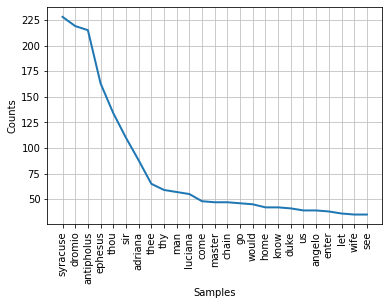

In [23]:
# Generating word and word_count in (key, value) pairs

import matplotlib.pyplot as plt

Word_Frequency = nltk.FreqDist(pre_processed)

print(Word_Frequency.keys())
print(Word_Frequency.values())

# Plot word frequency for 25 words
Word_Frequency.plot(25)

## Please answer the questions below to complete the experiment:

In [24]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [25]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NAN" #@param {type:"string"}


In [26]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [27]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4226
Date of submission:  19 Sep 2020
Time of submission:  14:07:54
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
